In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [12]:
orig= pd.read_csv('OlonOlatIntersect_329547.csv')
dest= pd.read_csv('DlonDlatIntersect_329547.csv')
#orig= pd.read_csv('ForGengGIS/OwithBG.csv')
#dest= pd.read_csv('ForGengGIS/DwithBG.csv')
od  = pd.read_csv('Car2goOD.csv')
block=pd.read_csv('SelectedBlock.csv')
print(orig.shape, dest.shape, od.shape, block.shape)

(329547, 35) (329547, 35) (329478, 14) (16773, 19)


/Users/MacBookPro/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Examine data

In [36]:
print(od.columns)
od.tail()

Index(['id', 'otime', 'dtime', 'olon', 'olat', 'dlon', 'dlat', 'distance',
       'ofuel', 'dfuel', 'fuel_consumption', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13'],
      dtype='object')


,id,otime,dtime,olon,olat,dlon,dlat,distance,ofuel,dfuel,fuel_consumption,Unnamed: 11,Unnamed: 12,Unnamed: 13
329473,AXG5757,2016/5/10 23:30,2016/5/10 23:59,-122.31027,47.60822,-122.33710,47.60337,1.298,33,33,0,NaN,NaN,NaN
329474,ATZ5056,2016/5/10 23:34,2016/5/10 23:57,-122.38874,47.68294,-122.36510,47.63340,3.596,63,60,3,NaN,NaN,NaN
329475,AWX9242,2016/5/10 23:36,2016/5/10 23:52,-122.38503,47.66777,-122.37906,47.67311,0.462,100,100,0,NaN,NaN,NaN
329476,ATZ5036,2016/5/10 23:43,2016/5/10 23:48,-122.30742,47.62516,-122.31260,47.62106,0.373,45,45,0,NaN,NaN,NaN
329477,AXG4728,2016/5/10 23:48,2016/5/10 23:58,-122.32785,47.61453,-122.32045,47.62527,0.819,57,54,3,NaN,NaN,NaN


In [5]:
# key for od is id+otime or id+dtime
od[od[['id', 'dtime']].duplicated()]

,id,otime,dtime,olon,olat,dlon,dlat,distance,ofuel,dfuel,fuel_consumption,Unnamed: 11,Unnamed: 12,Unnamed: 13


In [48]:
print(block.columns)
block.tail()

Index(['OBJECTID', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'BLOCKCE10',
       'GEOID10', 'NAME10', 'MTFCC10', 'UR10', 'UACE10', 'FUNCSTAT10',
       'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'TRACT_10',
       'Shape_Leng', 'Shape_Area', 'TRBL'],
      dtype='object')


,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,TRACT_10,Shape_Leng,Shape_Area,TRBL
16768,35821,53,33,26002,1010,530330260021010,Block 1010,G5040,NaN,NaN,S,3050.0,0.0,47.477009,-122.225155,26002,0.002638,3.639500e-07,26002.1010
16769,35824,53,33,23900,3006,530330239003006,Block 3006,G5040,NaN,NaN,S,25968.0,0.0,47.587391,-122.205143,23900,0.007388,3.105230e-06,23900.3006
16770,35825,53,33,23900,4026,530330239004026,Block 4026,G5040,NaN,NaN,S,6776.0,0.0,47.559004,-122.190780,23900,0.005107,8.098000e-07,23900.4026
16771,35826,53,33,24602,2008,530330246022008,Block 2008,G5040,NaN,NaN,S,25779.0,0.0,47.537500,-122.220007,24602,0.008605,3.079560e-06,24602.2008
16772,35832,53,33,22102,1018,530330221021018,Block 1018,G5040,NaN,NaN,S,79243.0,0.0,47.736264,-122.218108,22102,0.019371,9.502250e-06,22102.1018


In [ ]:
# block has 16773 rows
# the key is TRACTCE10+BLOCKCE10, or OBJECTID

In [54]:
len(block.OBJECTID.unique())

16773

In [34]:
block.groupby(['TRACTCE10','BLOCKCE10']).count().OBJECTID.shape

(16773,)

(0, 10000)

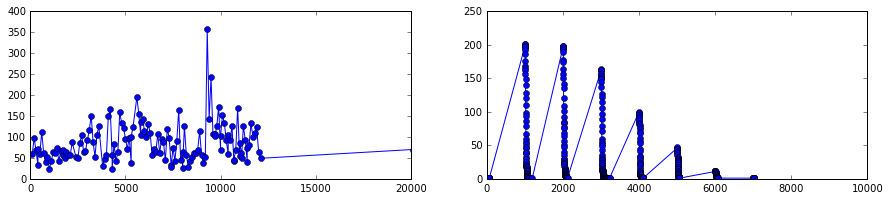

In [32]:
# each tract can have multiple blocks
plt.figure(figsize=(15, 3))
plt.subplot(121)
plt.plot(block.groupby(['TRACTCE10']).count().OBJECTID, 'o-')
plt.xlim(0,20000)

# each tract can have multiple blocks
plt.subplot(122)
plt.plot(block.groupby(['BLOCKCE10']).count().OBJECTID, 'o-')
plt.xlim(0,10000)

In [11]:
print(orig.columns)
orig.loc[:, :'BLOCKCE10'].tail()

Index(['OBJECTID', 'FID_Select', 'id', 'otime', 'dtime', 'olon', 'olat',
       'dlon', 'dlat', 'distance', 'ofuel', 'dfuel', 'fuel_consu',
       'FID_Sele_1', 'OBJECTID_1', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10',
       'BLKGRPCE10', 'GEOID10', 'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10',
       'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'Shape_Leng',
       'TRACT', 'TRBG'],
      dtype='object')


In [ ]:
# OBJECTID is the col from block
# FID_OlonOl is the index from od
# Im not sure how OBJECTID_1 was generated. maybe when merged in arcgis?

In [20]:
len(orig.OBJECTID.unique())

9000

In [70]:
orig.OBJECTID.describe()

count    329547.000000
mean      18148.949230
std        9573.392181
min           1.000000
25%       10540.000000
50%       18850.000000
75%       25820.000000
max       35434.000000
Name: OBJECTID, dtype: float64

In [74]:
orig.FID_OlonOl.describe()

count    329547.000000
mean     164739.058316
std       95110.515886
min           0.000000
25%       82375.500000
50%      164739.000000
75%      247104.500000
max      329477.000000
Name: FID_OlonOl, dtype: float64

# Process Data

In [13]:
# clean duplicate in orig and dest
# we verified that arcgis can place a pt twice in 2 regions if the pt falls on the boundary
# note that we have 329473 pts, compared to 329478 from od. cuz we threw out 5 pts out of bound
print(orig.shape, dest.shape)
orig=orig[~ orig['FID_OlonOl'].duplicated()]
dest=dest[~ dest['FID_DlonDl'].duplicated()]
print(orig.shape, dest.shape)

(329547, 35) (329547, 35)
(329473, 35) (329473, 35)


In [4]:
# add fid explicitly in od
od['fid']=od.index
od.head()

,id,otime,dtime,olon,olat,dlon,dlat,distance,ofuel,dfuel,fuel_consumption,Unnamed: 11,Unnamed: 12,Unnamed: 13,fid
0,AXG5761,2016/1/23 0:02,2016/1/23 0:29,-122.34148,47.63633,-122.34857,47.65491,1.326,63,63,0,NaN,NaN,NaN,0
1,ATZ5067,2016/1/23 0:02,2016/1/23 0:18,-122.30490,47.61251,-122.31481,47.58820,1.742,30,30,0,NaN,NaN,NaN,1
2,AUK2223,2016/1/23 0:02,2016/1/23 0:27,-122.28432,47.55700,-122.35897,47.66690,8.355,100,100,0,NaN,NaN,NaN,2
3,ATS2928,2016/1/23 0:04,2016/1/23 0:25,-122.36445,47.66644,-122.34596,47.70566,2.844,100,100,0,NaN,NaN,NaN,3
4,AXG4702,2016/1/23 0:04,2016/1/23 0:51,-122.33523,47.57528,-122.38755,47.68656,8.067,54,51,3,NaN,NaN,NaN,4


In [5]:
keepcol = ['id', 'otime', 'dtime', 'fid' ]
od = od.drop([col for col in od.columns if col not in keepcol], axis=1)
od.head()

,id,otime,dtime,fid
0,AXG5761,2016/1/23 0:02,2016/1/23 0:29,0
1,ATZ5067,2016/1/23 0:02,2016/1/23 0:18,1
2,AUK2223,2016/1/23 0:02,2016/1/23 0:27,2
3,ATS2928,2016/1/23 0:04,2016/1/23 0:25,3
4,AXG4702,2016/1/23 0:04,2016/1/23 0:51,4


In [6]:
orig.columns

Index(['OBJECTID_1', 'FID_OlonOl', 'id', 'otime', 'dtime', 'olon', 'olat',
       'dlon', 'dlat', 'distance', 'ofuel', 'dfuel', 'fuel_consu', 'F12',
       'F13', 'F14', 'FID_kc_blo', 'OBJECTID', 'STATEFP10', 'COUNTYFP10',
       'TRACTCE10', 'BLOCKCE10', 'GEOID10', 'NAME10', 'MTFCC10', 'UR10',
       'UACE10', 'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10',
       'INTPTLON10', 'TRACT_10', 'Shape_Leng', 'TRBL'],
      dtype='object')

In [7]:
keepcol = ['id', 'otime', 'dtime', 'OBJECTID', 'TRACTCE10', 'BLOCKCE10']
# orig = orig.drop([col for col in orig.columns if col not in keepcol], axis=1)
# orig.head()

o=pd.DataFrame()
for col in keepcol:
    o['o_'+ col] = orig[col]
o['fid'] = orig.FID_OlonOl
o.head()

,o_id,o_otime,o_dtime,o_OBJECTID,o_TRACTCE10,o_BLOCKCE10,fid
0,AXG5648,3/16/2016,3/16/2016,23211,27400,3003,163965
1,AXG5759,4/28/2016,4/28/2016,5963,990100,63,300778
2,AXG5024,3/13/2016,3/13/2016,14591,11900,2024,153629
3,AXG5473,3/2/2016,3/2/2016,14591,11900,2024,118750
4,AXG5473,3/29/2016,3/29/2016,14591,11900,2024,207443


In [8]:
dest.columns

Index(['OBJECTID_1', 'FID_DlonDl', 'id', 'otime', 'dtime', 'olon', 'olat',
       'dlon', 'dlat', 'distance', 'ofuel', 'dfuel', 'fuel_consu', 'F12',
       'F13', 'F14', 'FID_kc_blo', 'OBJECTID', 'STATEFP10', 'COUNTYFP10',
       'TRACTCE10', 'BLOCKCE10', 'GEOID10', 'NAME10', 'MTFCC10', 'UR10',
       'UACE10', 'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10',
       'INTPTLON10', 'TRACT_10', 'Shape_Leng', 'TRBL'],
      dtype='object')

In [9]:
keepcol = ['id', 'otime', 'dtime', 'OBJECTID', 'TRACTCE10', 'BLOCKCE10']
#dest = dest.drop([col for col in dest.columns if col not in keepcol], axis=1)
#dest.head()

d=pd.DataFrame()
for col in keepcol:
    d['d_'+ col] = dest[col]
d['fid'] = dest.FID_DlonDl
d.head()

,d_id,d_otime,d_dtime,d_OBJECTID,d_TRACTCE10,d_BLOCKCE10,fid
0,AXG5648,3/14/2016,3/14/2016,23211,27400,3003,157163
1,AKN2764,4/8/2016,4/8/2016,12881,26100,1011,242713
2,AXG5759,4/28/2016,4/28/2016,5963,990100,63,300350
3,AXG5024,3/12/2016,3/12/2016,14591,11900,2024,152205
4,AXG5473,3/1/2016,3/1/2016,14591,11900,2024,117152


In [10]:
d.sort_values('fid').head()

,d_id,d_otime,d_dtime,d_OBJECTID,d_TRACTCE10,d_BLOCKCE10,fid
230856,AXG5761,1/23/2016,1/23/2016,21941,4900,2006,0
43684,ATZ5067,1/23/2016,1/23/2016,12904,9400,1000,1
261518,AUK2223,1/23/2016,1/23/2016,10053,4800,1007,2
318418,ATS2928,1/23/2016,1/23/2016,12918,1300,2002,3
301429,AXG4702,1/23/2016,1/23/2016,26379,3100,1016,4


In [11]:
o.sort_values('fid').head()

,o_id,o_otime,o_dtime,o_OBJECTID,o_TRACTCE10,o_BLOCKCE10,fid
196443,AXG5761,1/23/2016,1/23/2016,16986,6700,1007,0
97652,ATZ5067,1/23/2016,1/23/2016,4641,7900,1006,1
17226,AUK2223,1/23/2016,1/23/2016,28309,10300,5013,2
260411,ATS2928,1/23/2016,1/23/2016,10049,4800,4003,3
30641,AXG4702,1/23/2016,1/23/2016,26741,9300,3038,4


In [12]:
od.head()

,id,otime,dtime,fid
0,AXG5761,2016/1/23 0:02,2016/1/23 0:29,0
1,ATZ5067,2016/1/23 0:02,2016/1/23 0:18,1
2,AUK2223,2016/1/23 0:02,2016/1/23 0:27,2
3,ATS2928,2016/1/23 0:04,2016/1/23 0:25,3
4,AXG4702,2016/1/23 0:04,2016/1/23 0:51,4


In [36]:
# now we have od, o and d
ood = pd.merge(o, od, on='fid')
oodd =pd.merge(ood, d, on='fid')
oodd.head()

,o_id,o_otime,o_dtime,o_OBJECTID,o_TRACTCE10,o_BLOCKCE10,fid,id,otime,dtime,d_id,d_otime,d_dtime,d_OBJECTID,d_TRACTCE10,d_BLOCKCE10
0,AXG5648,3/16/2016,3/16/2016,23211,27400,3003,163965,AXG5648,2016/3/16 14:13,2016/3/16 16:44,AXG5648,3/16/2016,3/16/2016,22383,2500,1012
1,AXG5759,4/28/2016,4/28/2016,5963,990100,63,300778,AXG5759,2016/4/28 8:20,2016/4/28 8:39,AXG5759,4/28/2016,4/28/2016,14449,7200,1065
2,AXG5024,3/13/2016,3/13/2016,14591,11900,2024,153629,AXG5024,2016/3/13 7:33,2016/3/13 8:16,AXG5024,3/13/2016,3/13/2016,21467,7500,4015
3,AXG5473,3/2/2016,3/2/2016,14591,11900,2024,118750,AXG5473,2016/3/2 5:28,2016/3/2 5:49,AXG5473,3/2/2016,3/2/2016,21193,9300,2015
4,AXG5473,3/29/2016,3/29/2016,14591,11900,2024,207443,AXG5473,2016/3/29 12:03,2016/3/29 12:27,AXG5473,3/29/2016,3/29/2016,34085,10002,4005


In [37]:
oodd.columns

Index(['o_id', 'o_otime', 'o_dtime', 'o_OBJECTID', 'o_TRACTCE10',
       'o_BLOCKCE10', 'fid', 'id', 'otime', 'dtime', 'd_id', 'd_otime',
       'd_dtime', 'd_OBJECTID', 'd_TRACTCE10', 'd_BLOCKCE10'],
      dtype='object')

In [38]:
oodd.o_id.equals(oodd.id)

True

In [39]:
oodd = oodd.drop(['o_id', 'o_otime', 'o_dtime', 'd_id', 'd_otime','d_dtime'],axis=1)

In [40]:
oodd.head()

,o_OBJECTID,o_TRACTCE10,o_BLOCKCE10,fid,id,otime,dtime,d_OBJECTID,d_TRACTCE10,d_BLOCKCE10
0,23211,27400,3003,163965,AXG5648,2016/3/16 14:13,2016/3/16 16:44,22383,2500,1012
1,5963,990100,63,300778,AXG5759,2016/4/28 8:20,2016/4/28 8:39,14449,7200,1065
2,14591,11900,2024,153629,AXG5024,2016/3/13 7:33,2016/3/13 8:16,21467,7500,4015
3,14591,11900,2024,118750,AXG5473,2016/3/2 5:28,2016/3/2 5:49,21193,9300,2015
4,14591,11900,2024,207443,AXG5473,2016/3/29 12:03,2016/3/29 12:27,34085,10002,4005


In [41]:
len(oodd.d_OBJECTID.unique())

8997

In [43]:
#oodd.to_pickle('oodd.df')
oodd = pd.read_pickle('oodd.df')

In [53]:
oodd['ohour']= pd.DatetimeIndex(oodd.otime).hour
oodd['dhour']= pd.DatetimeIndex(oodd.dtime).hour

In [54]:
oodd.head()

,o_OBJECTID,o_TRACTCE10,o_BLOCKCE10,fid,id,otime,dtime,d_OBJECTID,d_TRACTCE10,d_BLOCKCE10,ohour,dhour
0,23211,27400,3003,163965,AXG5648,2016/3/16 14:13,2016/3/16 16:44,22383,2500,1012,14,16
1,5963,990100,63,300778,AXG5759,2016/4/28 8:20,2016/4/28 8:39,14449,7200,1065,8,8
2,14591,11900,2024,153629,AXG5024,2016/3/13 7:33,2016/3/13 8:16,21467,7500,4015,7,8
3,14591,11900,2024,118750,AXG5473,2016/3/2 5:28,2016/3/2 5:49,21193,9300,2015,5,5
4,14591,11900,2024,207443,AXG5473,2016/3/29 12:03,2016/3/29 12:27,34085,10002,4005,12,12


In [70]:
dmap=oodd.groupby(['dhour','d_OBJECTID']).fid.count()
omap=oodd.groupby(['ohour','o_OBJECTID']).fid.count()

In [93]:
dmap.unstack(level=0, fill_value=0).shape

(8997, 24)

In [106]:
influxmap = dmap.unstack(level=0,fill_value=0)-omap.unstack(level=0, fill_value=0)
influxmap

dhour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
1,3.0,0.0,-1.0,6.0,2.0,5.0,30.0,38.0,82.0,16.0,...,-10.0,-37.0,-62.0,-17.0,-12.0,-4.0,-2.0,-4.0,3.0,-4.0
2,0.0,0.0,0.0,0.0,-1.0,-1.0,-2.0,-1.0,0.0,0.0,...,0.0,2.0,1.0,2.0,1.0,1.0,-1.0,-2.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,1.0,0.0,0.0,0.0,-1.0,0.0,1.0,-1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,...,-1.0,0.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,1.0,0.0,0.0,-1.0,-1.0,-3.0,-2.0,-1.0,...,-1.0,-1.0,1.0,0.0,3.0,0.0,3.0,1.0,1.0,-1.0
21,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,1.0,-1.0,0.0,0.0,1.0,1.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0
32,11.0,13.0,3.0,1.0,0.0,-6.0,-9.0,-11.0,-8.0,-1.0,...,-2.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,-1.0,5.0


In [98]:
os=set(oodd.o_OBJECTID.unique())
ds=set(oodd.d_OBJECTID.unique())

In [105]:
len(ds |os )

9020

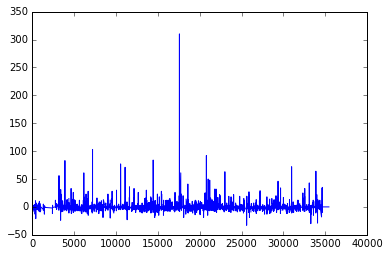

In [124]:
plt.plot(influxmap.ix[:,8])

In [126]:
influxmap.ix[:,8].to_pickle('influxtest.df')

In [130]:
influxmap.to_pickle('influxmap.df')
